In [143]:
import json

import pandas as pd
import numpy as np

import matplotlib as mpl
import matplotlib.pyplot as plt

from matplotlib.pyplot import imread
from matplotlib.patches import Polygon
from matplotlib.collections import PatchCollection
from random import choice

%matplotlib inline

In [300]:
def show_img(id_,dir_, ax=None, **kwargs):
    '''
    shows image with id_ in dir_
    '''
    if ax:
        return ax.imshow(imread(dir_ + f'{id_:012}.jpg'),**kwargs)
    else:
        return plt.imshow(imread(dir_ + f'{id_:012}.jpg'),**kwargs)
    
def reshape(flat):
    '''
    reshapes flattened coordinates to a 2-dim matrix [[x1,y1],[x2,y2],...]
    '''
    flat = np.array(flat[0])
    return flat.reshape(len(flat) // 2,2)
    
def show_img_annotated(id_, dir_, annotations_df):
    
    buildings = annotations_df.query(f'image_id == {id_}')
    flat_arrays = buildings.segmentation.values
    mats = [reshape(x) for x in flat_arrays]
    p = PatchCollection([Polygon(mat) for mat in mats],alpha=0.7)
    
    fig,ax = plt.subplots(nrows=1,ncols=1)
    show_img(id_,val_dir_ims,ax=ax)
    ax.add_collection(p)
    ax.set_xbound([0,300])
    ax.set_ybound([0,300])

# Initial data exploration

- NB to understand the data we have available and how to use the annotations

In [292]:
# Lets get a list of the validation (train is big not finished DL) images
val_dir = '../data/val_images/'
val_dir_ims = val_dir + 'images/'
ims = !ls {val_dir_ims}
len(ims)

60317

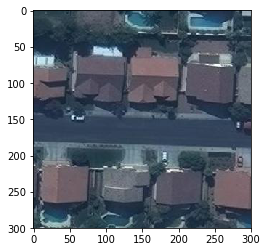

In [293]:
fig,ax = plt.subplots(nrows=1,ncols=1)

show_img(0,val_dir_ims,ax=ax)

In [294]:
# Lets take a look at the annotations
annotations = !ls {val_dir}*.json

small_annotation = json.loads(open(annotations[0]).read())
small_annotation_df = pd.DataFrame(small_annotation['annotations'])

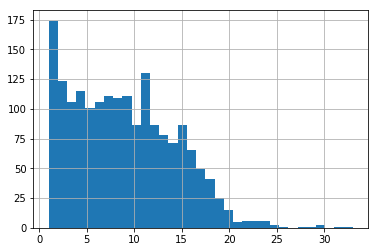

In [295]:
# how many buildings in images
counts = small_annotation_df.image_id.value_counts()
counts.hist(bins=counts.max())

- largest number of images have a single building

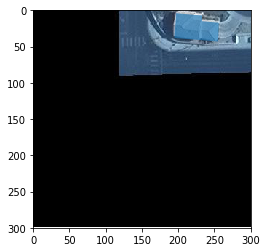

In [301]:
show_img_annotated(counts[counts == 1].index[0],val_dir_ims,small_annotation_df)

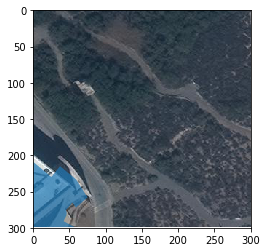

In [309]:
show_img_annotated(counts[counts == 1].index[6],val_dir_ims,small_annotation_df)

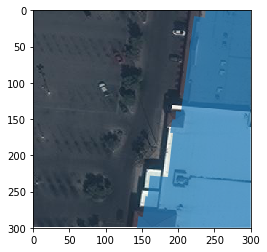

In [310]:
show_img_annotated(counts[counts == 1].index[14],val_dir_ims,small_annotation_df)

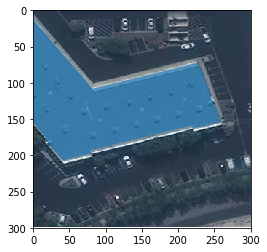

In [304]:
show_img_annotated(counts[counts == 1].index[10],val_dir_ims,small_annotation_df)

- some examples of images with lots of buildings

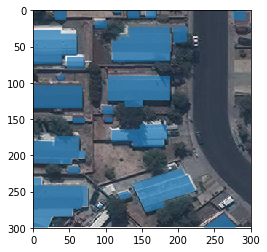

In [306]:
show_img_annotated(counts[counts > 16].index[10],val_dir_ims,small_annotation_df)

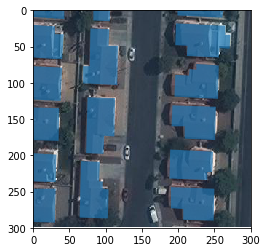

In [307]:
show_img_annotated(counts[counts > 16].index[-1],val_dir_ims,small_annotation_df)

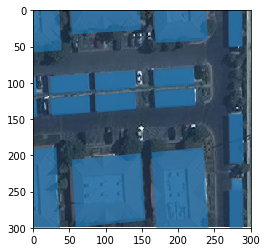

In [412]:
show_img_annotated(counts[counts > 16].index[-8],val_dir_ims,small_annotation_df)

- need a function that will take a list of annotations and return a 300x300 mask array
- need a function that will take a 300x300 mask array, seperate into non-joined blocks and write a list of annotations

43836    33
20137    32
5957     30
23900    30
51683    29
16805    28
40531    26
49026    25
57981    25
41228    24
16109    24
20468    24
7891     24
35204    24
8009     24
5030     23
50456    23
21301    23
49781    23
11313    23
57677    23
41177    22
58062    22
12391    22
35009    22
2669     22
8450     22
23370    21
12844    21
41469    21
         ..
52052    17
45020    17
57251    17
20461    17
3885     17
51764    17
32515    17
59088    17
16502    17
10054    17
23535    17
12752    17
18217    17
10761    17
1784     17
11413    17
40229    17
14643    17
46663    17
33192    17
50647    17
8955     17
54021    17
26885    17
46817    17
52998    17
24380    17
32032    17
44114    17
49768    17
Name: image_id, Length: 162, dtype: int64

In [341]:
small_annotation_df

,area,bbox,category_id,id,image_id,iscrowd,segmentation
0,42.0,"[152.0, 152.0, 28.0, 8.0]",100,377545,44153,0,"[[152.0, 180.0, 156.0, 176.0, 160.0, 181.0, 15..."
1,154.0,"[123, 243, 134, 14]",100,446305,52178,0,"[[257, 123, 243, 123, 243, 112, 257, 112, 257,..."
2,1885.0,"[74.0, 242.0, 199.0, 31.0]",100,431591,50456,0,"[[273.0, 139.0, 263.0, 139.0, 263.0, 147.0, 24..."
3,2745.0,"[40, 40, 260, 61]",100,447853,52350,0,"[[40, 300, 40, 255, 101, 255, 101, 300, 40, 300]]"
4,120.0,"[128, 293, 172, 7]",100,305540,35813,0,"[[300, 128, 293, 128, 300, 94, 300, 128]]"
5,1749.0,"[-2.842170943040401e-14, 258.0, 300.0, 42.0]",100,251004,29395,0,"[[258.0, 38.0, 271.0, 0.9999999999999716, 282...."
6,2997.0,"[0, 0, 111, 111]",100,502877,58819,0,"[[111, 26, 0, 28, 0, 0, 111, 0, 111, 26]]"
7,2275.0,"[66, 99, 50, 64]",100,171663,20137,0,"[[116, 86, 99, 86, 99, 68, 116, 68, 116, 66, 1..."
8,70.0,"[7.225416114969383e-15, 248.0, 268.0, 20.0]",100,347326,40728,0,"[[268.0, 7.225416114969383e-15, 268.0, 4.00000..."
9,138.0,"[244, 297, 56, 3]",100,428596,50123,0,"[[300, 244, 297, 244, 297, 198, 300, 198, 300,..."


In [413]:
anotations = list(small_annotation_df.query(f'image_id == {counts[counts > 16].index[-8]}').segmentation.values)

In [414]:
reshape(anotations[0])

array([[ 88., 141.],
       [ 86., 118.],
       [141., 113.],
       [142., 136.],
       [ 88., 141.]])

In [415]:
img = Image.new('L', (width, height), 0)
for polygon in anotations:
    ImageDraw.Draw(img).polygon(polygon[0], outline=1, fill=1)

In [486]:
type(img)

PIL.Image.Image

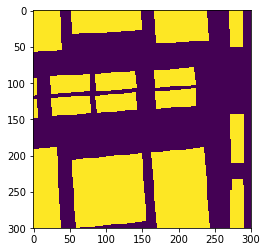

In [416]:
mask = numpy.array(img)
plt.imshow(mask)

In [400]:
def create_mask_array(annotations):
    img = Image.new('L', (width, height), 0)
    for polygon in annotations:
        ImageDraw.Draw(img).polygon(polygon[0], outline=1, fill=1)
    mask = numpy.array(img)
    
    return mask

In [446]:
x = create_mask_array(list(small_annotation_df.query(f'image_id == {counts[counts > 16].index[-8]}').segmentation.values))

In [355]:
from scipy.ndimage.measurements import find_objects,label

In [419]:
objs = find_objects(label(x)[0])

In [434]:
objs[0][0].stop

58

In [ ]:
objs[0][0].indices

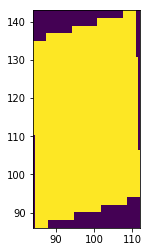

In [436]:
plt.imshow(mask[objs[5]],extent=[objs[5][0].start,objs[5][0].stop,objs[5][1].start,objs[5][1].stop])

In [366]:
import cv2 as cv

In [440]:
x = mask[objs[5]]

In [447]:
out = cv.findContours(x,cv.RETR_TREE, cv.CHAIN_APPROX_SIMPLE)

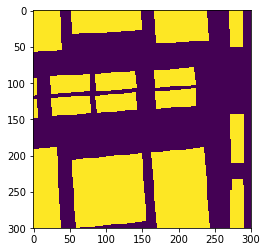

In [448]:
plt.imshow(out[0])

In [465]:
z.shape

(46, 1, 2)

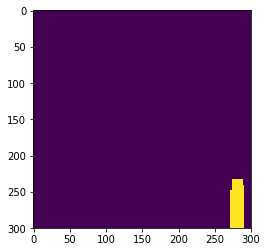

In [484]:
z= out[1][0]
z = z.reshape(z.shape[0],2).flatten()
img = Image.new('L', (width, height), 0)
ImageDraw.Draw(img).polygon(list(z), outline=1, fill=1)
mask = numpy.array(img)
plt.imshow(mask)

In [445]:
out[1][0].reshape(26,2)

array([[48,  0],
       [47,  1],
       [34,  1],
       [33,  2],
       [21,  2],
       [20,  3],
       [ 7,  3],
       [ 6,  4],
       [ 0,  4],
       [ 0, 15],
       [ 1, 16],
       [ 1, 27],
       [ 7, 27],
       [ 8, 26],
       [21, 26],
       [22, 25],
       [35, 25],
       [36, 24],
       [49, 24],
       [50, 23],
       [56, 23],
       [56, 18],
       [55, 17],
       [55,  6],
       [54,  5],
       [54,  0]], dtype=int32)

In [390]:
out[1][0].reshape(29,2).flatten()

array([45,  0, 44,  1, 27,  1, 26,  2, 18,  2, 18, 16, 19, 17, 19, 29, 18,
       30,  0, 30,  0, 47,  1, 48,  1, 78, 12, 78, 13, 77, 24, 77, 24, 65,
       25, 64, 41, 64, 42, 63, 59, 63, 59, 48, 58, 47, 58, 32, 55, 32, 54,
       31, 54, 16, 53, 15, 53,  0], dtype=int32)

In [462]:
img = Image.new('L', (width, height), 0)
ImageDraw.Draw(img).polygon(list(z.reshape(64,2).flatten()), outline=1, fill=1)

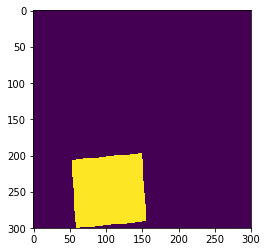

In [463]:
mask = numpy.array(img)
plt.imshow(mask)